In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from sklearn import preprocessing

In [15]:
data = pd.read_csv("data/data_PE_no_lab_measurements.csv")

In [16]:
data

,Unnamed: 0,age,sex,country,income,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,...,symptoms_wheezing,treat_extracorporeal,treat_high_flow_nasal_cannula,treat_inhaled_nitric_oxide,treat_invasive_ventilation,treat_non_invasive_ventilation,treat_respiratory_support,treat_tracheostomy,treat_oxy,PE
0,294,49.0,Male,Spain,High income,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,295,47.0,Male,Spain,High income,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,296,86.0,Male,Spain,High income,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,297,77.0,Male,Spain,High income,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,298,75.0,Female,Spain,High income,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766818,800455,54.0,Male,Spain,High income,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,True
766819,800456,56.0,Female,Spain,High income,False,True,False,False,False,...,False,True,False,False,True,False,False,True,True,False
766820,800457,49.0,Male,Spain,High income,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
766821,800458,71.0,Male,Spain,High income,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False


In [229]:
# Drop old index
data.drop('Unnamed: 0', axis=1, inplace=True)

In [230]:
data.columns

Index(['age', 'sex', 'country', 'income', 'comorbid_aids_hiv',
       'comorbid_asthma', 'comorbid_chronic_cardiac_disease',
       'comorbid_chronic_haematological_disease',
       'comorbid_chronic_kidney_disease',
       'comorbid_chronic_neurological_disorder',
       'comorbid_chronic_pulmonary_disease', 'comorbid_dementia',
       'comorbid_diabetes', 'comorbid_hypertension',
       'comorbid_immunosuppression', 'comorbid_liver_disease',
       'comorbid_malignant_neoplasm', 'comorbid_malnutrition',
       'comorbid_obesity', 'comorbid_rheumatologic_disorder',
       'comorbid_smoking', 'comorbid_tuberculosis', 'symptomatic',
       'symptoms_abdominal_pain', 'symptoms_altered_consciousness_confusion',
       'symptoms_bleeding', 'symptoms_chest_pain', 'symptoms_conjunctivitis',
       'symptoms_cough', 'symptoms_diarrhoea', 'symptoms_ear_pain',
       'symptoms_fatigue_malaise', 'symptoms_headache',
       'symptoms_history_of_fever', 'symptoms_lost_altered_sense_of_smell',
    

In [231]:
# Encode sex, country, and income
le = preprocessing.LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['country'] = le.fit_transform(data['country'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
data['income'] = data['income'].map({'High income':3, 'Upper middle income':2, 'Lower middle income':1, 'Low income':0})

{'Argentina': 0, 'Australia': 1, 'Belgium': 2, 'Bolivia': 3, 'Brazil': 4, 'Canada': 5, 'Chile': 6, 'Colombia': 7, 'Estonia': 8, 'Few': 9, 'France': 10, 'Germany': 11, 'Gibraltar': 12, 'India': 13, 'Indonesia': 14, 'Ireland': 15, 'Israel': 16, 'Italy': 17, 'Japan': 18, 'Kuwait': 19, 'Lao PDR': 20, 'Malawi': 21, 'Malaysia': 22, 'Nepal': 23, 'Netherlands': 24, 'New Zealand': 25, 'Norway': 26, 'Pakistan': 27, 'Peru': 28, 'Poland': 29, 'Portugal': 30, 'Qatar': 31, 'Romania': 32, 'Russian Federation': 33, 'Saudi Arabia': 34, 'South Africa': 35, 'Spain': 36, 'Ukraine': 37, 'United Kingdom': 38, 'United States': 39}


In [226]:
# Convert boolean to binary variables
f = lambda x: 1 if x==True else 0
data.iloc[:, 4:] = data.iloc[:, 4:].applymap(f)

In [227]:
data

,age,sex,country,income,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_immunosuppression,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,comorbid_tuberculosis,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,treat_extracorporeal,treat_high_flow_nasal_cannula,treat_inhaled_nitric_oxide,treat_invasive_ventilation,treat_non_invasive_ventilation,treat_respiratory_support,treat_tracheostomy,treat_oxy,PE
0,49.0,1,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,47.0,1,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,86.0,1,36,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,77.0,1,36,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,75.0,0,36,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766818,54.0,1,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1
766819,56.0,0,36,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0
766820,49.0,1,36,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0
766821,71.0,1,36,3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0


In [122]:
# Missing values per feature
data.isnull().sum(axis = 0)

age                                         0
sex                                         0
country                                     0
income                                      0
comorbid_aids_hiv                           0
comorbid_asthma                             0
comorbid_chronic_cardiac_disease            0
comorbid_chronic_haematological_disease     0
comorbid_chronic_kidney_disease             0
comorbid_chronic_neurological_disorder      0
comorbid_chronic_pulmonary_disease          0
comorbid_dementia                           0
comorbid_diabetes                           0
comorbid_hypertension                       0
comorbid_immunosuppression                  0
comorbid_liver_disease                      0
comorbid_malignant_neoplasm                 0
comorbid_malnutrition                       0
comorbid_obesity                            0
comorbid_rheumatologic_disorder             0
comorbid_smoking                            0
comorbid_tuberculosis             

<AxesSubplot:>

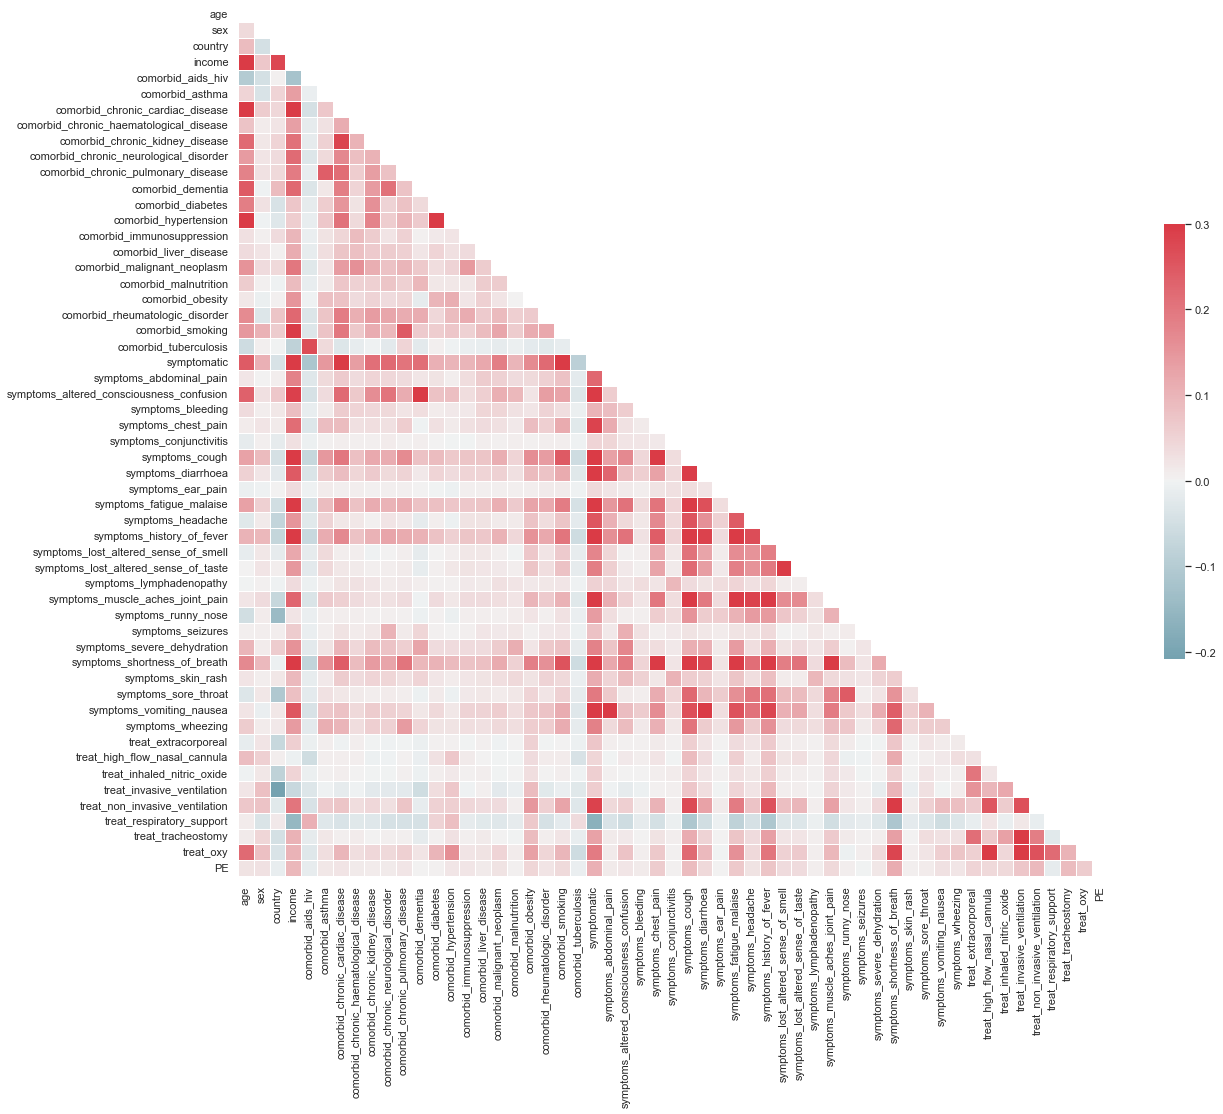

In [110]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [111]:
# The top 55 correlation pairs printed
c = data.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[2910:2970])

symptoms_muscle_aches_joint_pain          symptomatic                                 0.315249
symptomatic                               symptoms_muscle_aches_joint_pain            0.315249
treat_tracheostomy                        treat_invasive_ventilation                  0.317232
treat_invasive_ventilation                treat_tracheostomy                          0.317232
symptoms_shortness_of_breath              treat_non_invasive_ventilation              0.320158
treat_non_invasive_ventilation            symptoms_shortness_of_breath                0.320158
age                                       comorbid_hypertension                       0.324790
comorbid_hypertension                     age                                         0.324790
symptomatic                               symptoms_vomiting_nausea                    0.324872
symptoms_vomiting_nausea                  symptomatic                                 0.324872
                                          symptoms

In [123]:
# Get stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

X = data.drop('PE', axis=1, inplace=False).to_numpy()
y = data['PE'].to_numpy()

sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [440679  10919 418317 ... 143368 482286 762214] TEST: [742427 416325 137614 ... 379846 454798 584861]


In [124]:
# If you do not want it stratified.
# selected_rows = data[~data.isnull().any(axis=1)]

# #Get test set (20% of original dataset)

# # get random sample 
# test = selected_rows.sample(n=round(0.2*766823), axis=0)

# # get everything but the test sample
# train = selected_rows.drop(index=test.index)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((613458, 54), (153365, 54), (613458,), (153365,))

In [126]:
np.save('X_train_PE_no_lab_measurement', X_train)
np.save('X_test_PE_no_lab_measurement', X_test)
np.save('y_train_PE_no_lab_measurement', y_train)
np.save('y_test_PE_no_lab_measurement', y_test)

# Only Spain and UK

In [232]:
data = pd.read_csv("data/data_PE_no_lab_measurements_SpainUK.csv")

In [145]:
data

,Unnamed: 0,age,sex,country,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,...,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE
0,294,49.0,Male,Spain,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,295,47.0,Male,Spain,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,296,86.0,Male,Spain,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,297,77.0,Male,Spain,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,298,75.0,Female,Spain,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269368,800455,54.0,Male,Spain,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
269369,800456,56.0,Female,Spain,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
269370,800457,49.0,Male,Spain,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
269371,800458,71.0,Male,Spain,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [233]:
# Drop old index
data.drop('Unnamed: 0', axis=1, inplace=True)

In [234]:
data.columns

Index(['age', 'sex', 'country', 'comorbid_aids_hiv', 'comorbid_asthma',
       'comorbid_chronic_cardiac_disease',
       'comorbid_chronic_haematological_disease',
       'comorbid_chronic_kidney_disease',
       'comorbid_chronic_neurological_disorder',
       'comorbid_chronic_pulmonary_disease', 'comorbid_dementia',
       'comorbid_diabetes', 'comorbid_hypertension',
       'comorbid_immunosuppression', 'comorbid_liver_disease',
       'comorbid_malignant_neoplasm', 'comorbid_malnutrition',
       'comorbid_obesity', 'comorbid_rheumatologic_disorder',
       'comorbid_smoking', 'comorbid_tuberculosis', 'symptomatic',
       'symptoms_abdominal_pain', 'symptoms_altered_consciousness_confusion',
       'symptoms_bleeding', 'symptoms_chest_pain', 'symptoms_conjunctivitis',
       'symptoms_cough', 'symptoms_diarrhoea', 'symptoms_ear_pain',
       'symptoms_fatigue_malaise', 'symptoms_headache',
       'symptoms_history_of_fever', 'symptoms_lost_altered_sense_of_smell',
       'sympto

In [147]:
# Encode sex, country, PE
data['sex'] = data['sex'].map({'Male':1, 'Female':0})
data['country'] = data['country'].map({'Spain':1, 'United Kingdom':0})

In [150]:
# Convert boolean to binary variables
f = lambda x: 1 if x==True else 0
data.iloc[:, 3:] = data.iloc[:, 3:].applymap(f)

In [151]:
# Missing values per feature
data.isnull().sum(axis = 0)

age                                         0
sex                                         0
country                                     0
comorbid_aids_hiv                           0
comorbid_asthma                             0
comorbid_chronic_cardiac_disease            0
comorbid_chronic_haematological_disease     0
comorbid_chronic_kidney_disease             0
comorbid_chronic_neurological_disorder      0
comorbid_chronic_pulmonary_disease          0
comorbid_dementia                           0
comorbid_diabetes                           0
comorbid_hypertension                       0
comorbid_immunosuppression                  0
comorbid_liver_disease                      0
comorbid_malignant_neoplasm                 0
comorbid_malnutrition                       0
comorbid_obesity                            0
comorbid_rheumatologic_disorder             0
comorbid_smoking                            0
comorbid_tuberculosis                       0
symptomatic                       

<AxesSubplot:>

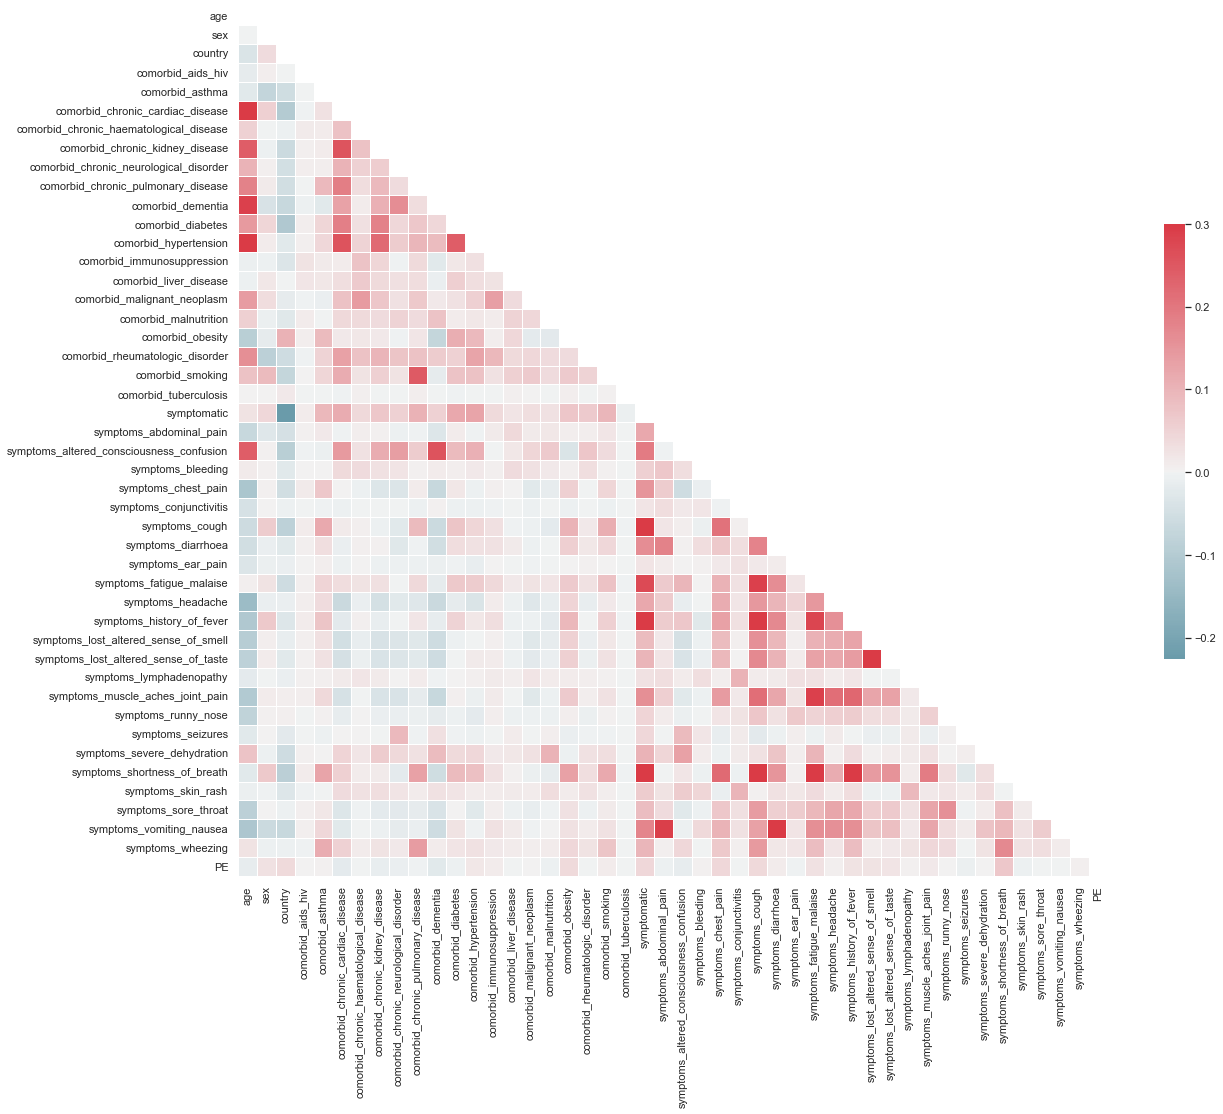

In [152]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [157]:
c = data.corr()
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
c

,age,sex,country,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_immunosuppression,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,comorbid_tuberculosis,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE
age,1.000000,-0.000606,-0.034665,-0.016149,-0.023923,0.338486,0.052677,0.240653,0.102964,0.181161,0.288199,0.142205,0.305725,-0.007871,-0.007402,0.138411,0.053734,-0.093308,0.158677,0.079223,0.001425,0.024810,-0.069068,0.241273,0.012882,-0.114868,-0.043837,-0.061210,-0.050964,-0.033749,0.004774,-0.140437,-0.107404,-0.096732,-0.085588,-0.019497,-0.103242,-0.079775,-0.023903,0.074787,-0.022458,-0.008089,-0.086620,-0.114377,0.024446,-0.014304
sex,-0.000606,1.000000,0.036846,0.006945,-0.076487,0.054823,-0.001675,-0.006743,0.004977,0.013589,-0.039165,0.045536,0.009129,-0.005485,0.017563,0.033907,-0.009496,-0.017762,-0.087255,0.090512,0.001565,0.041756,-0.028978,0.003827,0.002485,0.003657,0.001775,0.060993,-0.011273,-0.009594,0.023288,-0.011430,0.066550,0.006563,0.012562,-0.000121,0.011557,0.002583,0.001843,-0.004420,0.067176,-0.003285,0.001880,-0.062153,-0.006844,0.026175
country,-0.034665,0.036846,1.000000,0.000152,-0.054380,-0.100246,-0.006561,-0.061481,-0.049310,-0.051950,-0.069084,-0.109523,-0.022389,-0.033410,-0.000804,-0.017281,-0.027828,0.104570,-0.058020,-0.074837,0.015754,-0.225407,-0.046464,-0.092067,-0.025684,-0.052372,-0.007706,-0.085453,-0.023447,-0.011703,-0.056632,-0.011196,-0.031223,-0.013730,-0.023281,-0.010955,0.008420,0.006447,-0.021252,-0.055469,-0.087916,-0.030994,-0.005614,-0.068486,-0.007336,0.039246
comorbid_aids_hiv,-0.016149,0.006945,0.000152,1.000000,-0.000069,-0.002232,0.013599,0.005412,0.007539,-0.001379,-0.006206,0.007351,0.004743,0.024900,0.019538,-0.001919,0.010171,0.007778,-0.003527,0.002115,-0.000209,0.012465,0.003161,-0.002223,0.000830,0.014364,0.000159,0.012244,0.005693,0.001539,0.005884,0.006696,0.011936,0.005955,0.002551,0.002477,0.007467,-0.000341,0.000008,0.003476,0.009626,-0.002005,0.004821,0.005224,-0.001966,0.000816
comorbid_asthma,-0.023923,-0.076487,-0.054380,-0.000069,1.000000,0.027404,0.010850,0.009149,0.008446,0.092652,-0.024275,0.046344,0.042564,0.013437,0.017327,-0.011531,-0.001516,0.088998,0.050806,0.047449,-0.001378,0.095552,0.015485,-0.009249,0.000536,0.069486,-0.002901,0.117430,0.033125,0.007715,0.047728,0.035833,0.073805,0.030841,0.028240,0.005654,0.040257,0.002597,-0.005469,0.001117,0.126854,-0.000563,0.018440,0.041960,0.113572,0.003377
comorbid_chronic_cardiac_disease,0.338486,0.054823,-0.100246,-0.002232,0.027404,1.000000,0.079868,0.256718,0.101793,0.188925,0.128899,0.186049,0.258029,0.010043,0.032903,0.077044,0.040637,0.014735,0.132505,0.113193,-0.002140,0.113547,-0.002217,0.143978,0.038877,0.002287,-0.004307,0.012857,-0.010596,-0.007709,0.034878,-0.063620,-0.021843,-0.049676,-0.046266,0.014312,-0.043340,-0.015438,0.001656,0.049394,0.055297,0.035822,-0.030498,-0.024462,0.052085,-0.019437
comorbid_chronic_haematological_disease,0.052677,-0.001675,-0.006561,0.013599,0.010850,0.079868,1.000000,0.077359,0.053019,0.034736,0.012081,0.030399,0.051425,0.075628,0.064936,0.140154,0.038248,0.017091,0.078570,0.023698,0.004569,0.039898,0.006976,0.025275,0.03

In [158]:
# Get stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

X = data.drop('PE', axis=1, inplace=False).to_numpy()
y = data['PE'].to_numpy()

sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [112510 244440 266096 ... 233413 255060 123956] TEST: [  9228 119002  94717 ... 180462 164867  97595]


In [159]:
np.save('X_train_PE_no_lab_measurement_SpainUK', X_train)
np.save('X_test_PE_no_lab_measurement_SpainUK', X_test)
np.save('y_train_PE_no_lab_measurement_SpainUK', y_train)
np.save('y_test_PE_no_lab_measurement_SpainUK', y_test)

# Combine UK and Spain for training, separate for testing

In [17]:
data_UK = pd.read_csv("data/data_PE_no_lab_measurements_UK.csv")
data_Spain = pd.read_csv("data/data_PE_no_lab_measurements_Spain.csv")

# Drop old index and country
data_UK.drop('Unnamed: 0', axis=1, inplace=True)
data_UK.drop('comorbid_tuberculosis', axis=1, inplace=True)
data_UK.drop('comorbid_immunosuppression', axis=1, inplace=True)
data_Spain.drop('Unnamed: 0', axis=1, inplace=True)
data_Spain.drop('comorbid_tuberculosis', axis=1, inplace=True)
data_Spain.drop('comorbid_immunosuppression', axis=1, inplace=True)

In [18]:
# Encode sex
data_UK['sex'] = data_UK['sex'].map({'Male':1, 'Female':0})
data_Spain['sex'] = data_Spain['sex'].map({'Male':1, 'Female':0})
# Encode country
data_UK['country'] = data_UK['country'].map({'Spain':1, 'United Kingdom':0})
data_Spain['country'] = data_Spain['country'].map({'Spain':1, 'United Kingdom':0})
# Encode age
data_UK['agegp10'] = data_UK['agegp10'].map({'[80,120)':4, '[60,80)':3, '[40,60)':2, '[20,40)':1, '[0,20)':0})
data_Spain['agegp10'] = data_Spain['agegp10'].map({'[80,120)':4, '[60,80)':3, '[40,60)':2, '[20,40)':1, '[0,20)':0})

In [19]:
features = ['Age', 'Sex', 'Country', 'AIDS', 'Asthma',
       'Chronic cardiac disease',
       'Chronic haematological disease',
       'Chronic kidney disease',
       'Chronic neurological disorder',
       'Chronic pulmonary disease', 'Dementia',
       'Diabetes', 'Hypertension', 'Liver disease',
       'Malignant neoplasm', 'Malnutrition',
       'Obesity', 'Rheumatologic disorder',
       'Smoking', 'Symptomatic',
       'Abdominal pain', 'Confusion',
       'Bleeding', 'Chest pain', 'Conjunctivitis',
       'Cough', 'Diarrhoea', 'Ear pain',
       'Fatigue malaise', 'Headache',
       'Fever', 'Lost or altered sense of smell',
       'Lost or altered sense of taste', 'Lymphadenopathy',
       'Muscle aches or joint pain', 'Runny nose',
       'Seizures', 'Severe dehydration',
       'Shortness of breath', 'Skin rash',
       'Sore throat', 'Vomiting or nausea', 'Wheezing', 'PE']

In [20]:
# Convert boolean to binary variables
f = lambda x: 1 if x==True else 0
data_UK.iloc[:, 3:] = data_UK.iloc[:, 3:].applymap(f)
data_Spain.iloc[:, 3:] = data_Spain.iloc[:, 3:].applymap(f)

In [21]:
data = pd.concat([data_UK, data_Spain])
data.columns = features

In [22]:
data

,Age,Sex,Country,AIDS,Asthma,Chronic cardiac disease,Chronic haematological disease,Chronic kidney disease,Chronic neurological disorder,Chronic pulmonary disease,...,Muscle aches or joint pain,Runny nose,Seizures,Severe dehydration,Shortness of breath,Skin rash,Sore throat,Vomiting or nausea,Wheezing,PE
0,4,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15203,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15204,2,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15205,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15206,3,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


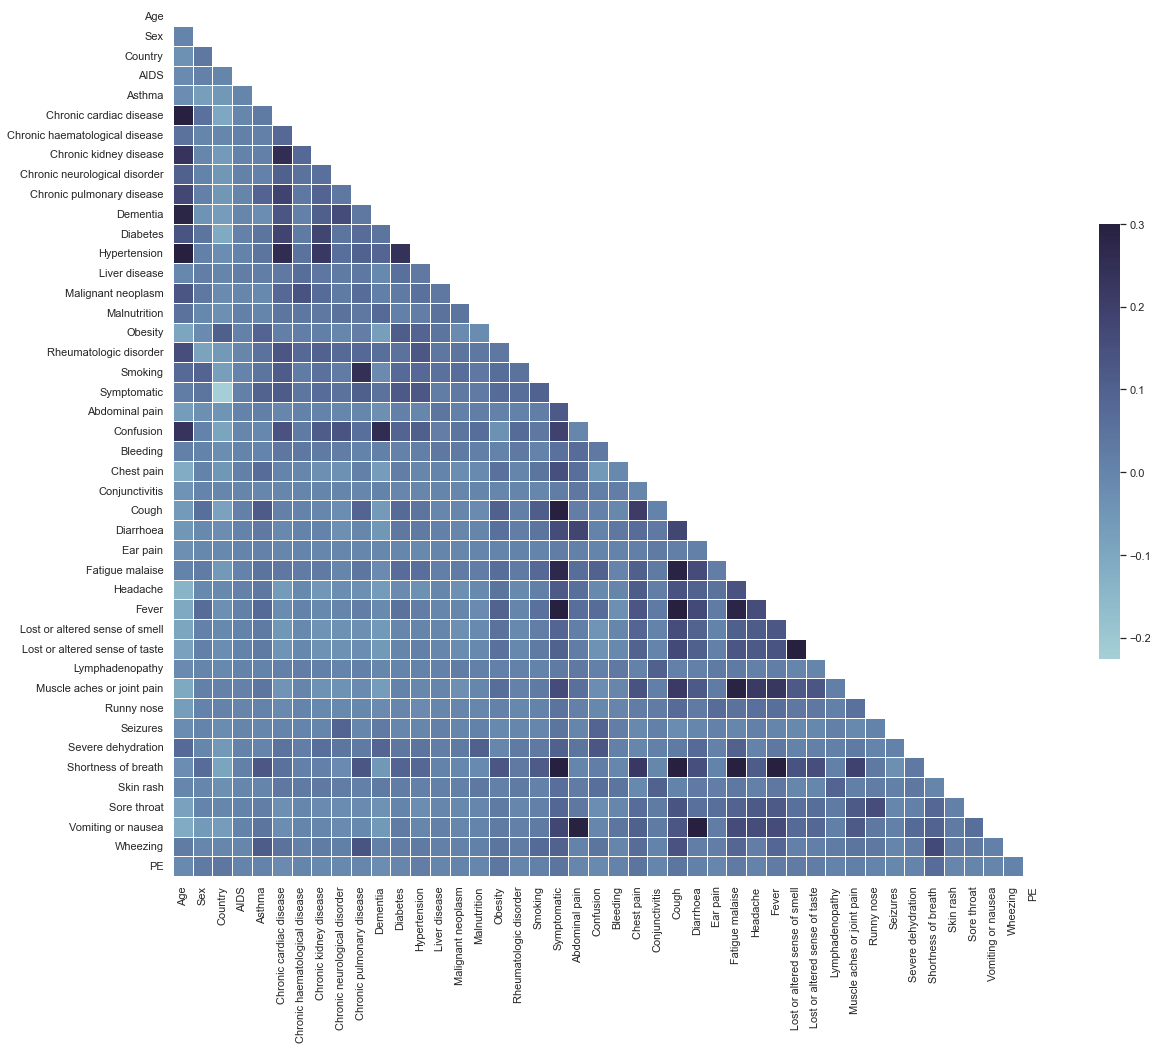

In [23]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('Correlation_SpainUK.png', dpi=600, bbox_inches='tight')

<AxesSubplot:>

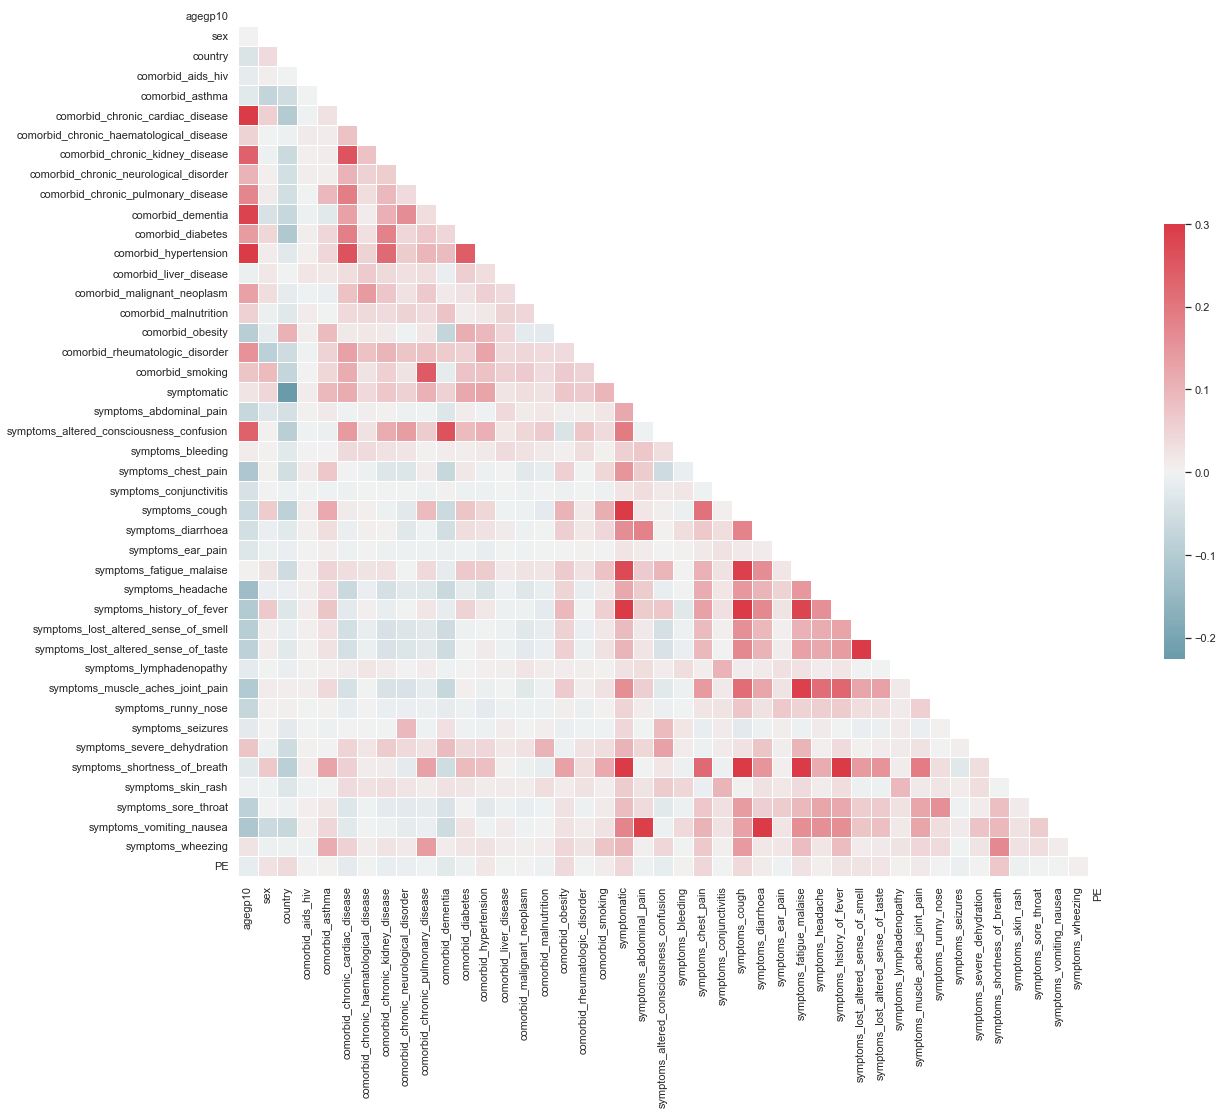

In [271]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = pd.concat([data_UK, data_Spain]).corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [272]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
corr

,agegp10,sex,country,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE
agegp10,1.000000,0.001154,-0.035034,-0.016079,-0.023679,0.332080,0.051620,0.235580,0.101306,0.174666,0.285581,0.139900,0.297426,-0.008779,0.133534,0.052298,-0.094809,0.155383,0.074140,0.022412,-0.068465,0.235777,0.012556,-0.114147,-0.041085,-0.062464,-0.050278,-0.032117,0.003063,-0.138916,-0.104187,-0.095815,-0.085148,-0.018302,-0.102857,-0.071438,-0.021293,0.072683,-0.025868,-0.004667,-0.084741,-0.111324,0.024031,-0.014994
sex,0.001154,1.000000,0.036846,0.006945,-0.076487,0.054823,-0.001675,-0.006743,0.004977,0.013589,-0.039165,0.045536,0.009129,0.017563,0.033907,-0.009496,-0.017762,-0.087255,0.090512,0.041756,-0.028978,0.003827,0.002485,0.003657,0.001775,0.060993,-0.011273,-0.009594,0.023288,-0.011430,0.066550,0.006563,0.012562,-0.000121,0.011557,0.002583,0.001843,-0.004420,0.067176,-0.003285,0.001880,-0.062153,-0.006844,0.026175
country,-0.035034,0.036846,1.000000,0.000152,-0.054380,-0.100246,-0.006561,-0.061481,-0.049310,-0.051950,-0.069084,-0.109523,-0.022389,-0.000804,-0.017281,-0.027828,0.104570,-0.058020,-0.074837,-0.225407,-0.046464,-0.092067,-0.025684,-0.052372,-0.007706,-0.085453,-0.023447,-0.011703,-0.056632,-0.011196,-0.031223,-0.013730,-0.023281,-0.010955,0.008420,0.006447,-0.021252,-0.055469,-0.087916,-0.030994,-0.005614,-0.068486,-0.007336,0.039246
comorbid_aids_hiv,-0.016079,0.006945,0.000152,1.000000,-0.000069,-0.002232,0.013599,0.005412,0.007539,-0.001379,-0.006206,0.007351,0.004743,0.019538,-0.001919,0.010171,0.007778,-0.003527,0.002115,0.012465,0.003161,-0.002223,0.000830,0.014364,0.000159,0.012244,0.005693,0.001539,0.005884,0.006696,0.011936,0.005955,0.002551,0.002477,0.007467,-0.000341,0.000008,0.003476,0.009626,-0.002005,0.004821,0.005224,-0.001966,0.000816
comorbid_asthma,-0.023679,-0.076487,-0.054380,-0.000069,1.000000,0.027404,0.010850,0.009149,0.008446,0.092652,-0.024275,0.046344,0.042564,0.017327,-0.011531,-0.001516,0.088998,0.050806,0.047449,0.095552,0.015485,-0.009249,0.000536,0.069486,-0.002901,0.117430,0.033125,0.007715,0.047728,0.035833,0.073805,0.030841,0.028240,0.005654,0.040257,0.002597,-0.005469,0.001117,0.126854,-0.000563,0.018440,0.041960,0.113572,0.003377
comorbid_chronic_cardiac_disease,0.332080,0.054823,-0.100246,-0.002232,0.027404,1.000000,0.079868,0.256718,0.101793,0.188925,0.128899,0.186049,0.258029,0.032903,0.077044,0.040637,0.014735,0.132505,0.113193,0.113547,-0.002217,0.143978,0.038877,0.002287,-0.004307,0.012857,-0.010596,-0.007709,0.034878,-0.063620,-0.021843,-0.049676,-0.046266,0.014312,-0.043340,-0.015438,0.001656,0.049394,0.055297,0.035822,-0.030498,-0.024462,0.052085,-0.019437
comorbid_chronic_haematological_disease,0.051620,-0.001675,-0.006561,0.013599,0.010850,0.079868,1.000000,0.077359,0.053019,0.034736,0.012081,0.030399,0.051425,0.064936,0.140154,0.038248,0.017091,0.078570,0.023698,0.039898,0.006976,0.025275,0.036965,-0.005341,-0.000044,0.005068,0.006425,0.000717,0.022936,-0.010181,0.006365,-0.013762,-0.009830,0.019313,-0.000958,0.002090,0.001768,0.020008,0.009599,0.025318,-0.003327,-

In [265]:
# Get the test sets for UK, Spain, UK+Spain
# Get stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

X_UK = data_UK.drop('PE', axis=1, inplace=False).to_numpy()
y_UK = data_UK['PE'].to_numpy()

sss.get_n_splits(X_UK, y_UK)

for train_index, test_index in sss.split(X_UK, y_UK):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_UK, X_test_UK = X_UK[train_index], X_UK[test_index]
    y_train_UK, y_test_UK = y_UK[train_index], y_UK[test_index]
    
X_Spain = data_Spain.drop('PE', axis=1, inplace=False).to_numpy()
y_Spain = data_Spain['PE'].to_numpy()

sss.get_n_splits(X_Spain, y_Spain)

for train_index, test_index in sss.split(X_Spain, y_Spain):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_Spain, X_test_Spain = X_Spain[train_index], X_Spain[test_index]
    y_train_Spain, y_test_Spain = y_Spain[train_index], y_Spain[test_index]

TRAIN: [171138 110972  49692 ... 234110  63225 195517] TEST: [189962 108635 201048 ... 145129 227922 174434]
TRAIN: [ 9520  9250  7866 ...  2188 12300  6071] TEST: [ 7036  3137 13796 ...    60  9835 11055]


In [266]:
# Get the training and test sets for the model combining both
X_train = np.concatenate((X_train_UK, X_train_Spain), axis=0)
y_train = np.concatenate((y_train_UK, y_train_Spain), axis=0)

X_test = np.concatenate((X_test_UK, X_test_Spain), axis=0)
y_test = np.concatenate((y_test_UK, y_test_Spain), axis=0)

In [267]:
np.save('X_test_PE_no_lab_measurement_UK', X_test_UK)
np.save('y_test_PE_no_lab_measurement_UK', y_test_UK)
np.save('X_test_PE_no_lab_measurement_Spain', X_test_Spain)
np.save('y_test_PE_no_lab_measurement_Spain', y_test_Spain)
np.save('X_train_PE_no_lab_measurement_UKSpain', X_train)
np.save('y_train_PE_no_lab_measurement_UKSpain', y_train)
np.save('X_test_PE_no_lab_measurement_UKSpain', X_test)
np.save('y_test_PE_no_lab_measurement_UKSpain', y_test)

# Only UK

In [196]:
# Drop old index and country
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('country', axis=1, inplace=True)
data.drop('comorbid_tuberculosis', axis=1, inplace=True)
data.drop('comorbid_immunosuppression', axis=1, inplace=True)

In [197]:
# Encode sex
data['sex'] = data['sex'].map({'Male':1, 'Female':0})

In [198]:
# Convert boolean to binary variables
f = lambda x: 1 if x==True else 0
data.iloc[:, 2:] = data.iloc[:, 2:].applymap(f)

In [199]:
# Missing values per feature
data.isnull().sum(axis = 0)

age                                         0
sex                                         0
comorbid_aids_hiv                           0
comorbid_asthma                             0
comorbid_chronic_cardiac_disease            0
comorbid_chronic_haematological_disease     0
comorbid_chronic_kidney_disease             0
comorbid_chronic_neurological_disorder      0
comorbid_chronic_pulmonary_disease          0
comorbid_dementia                           0
comorbid_diabetes                           0
comorbid_hypertension                       0
comorbid_liver_disease                      0
comorbid_malignant_neoplasm                 0
comorbid_malnutrition                       0
comorbid_obesity                            0
comorbid_rheumatologic_disorder             0
comorbid_smoking                            0
symptomatic                                 0
symptoms_abdominal_pain                     0
symptoms_altered_consciousness_confusion    0
symptoms_bleeding                 

<AxesSubplot:>

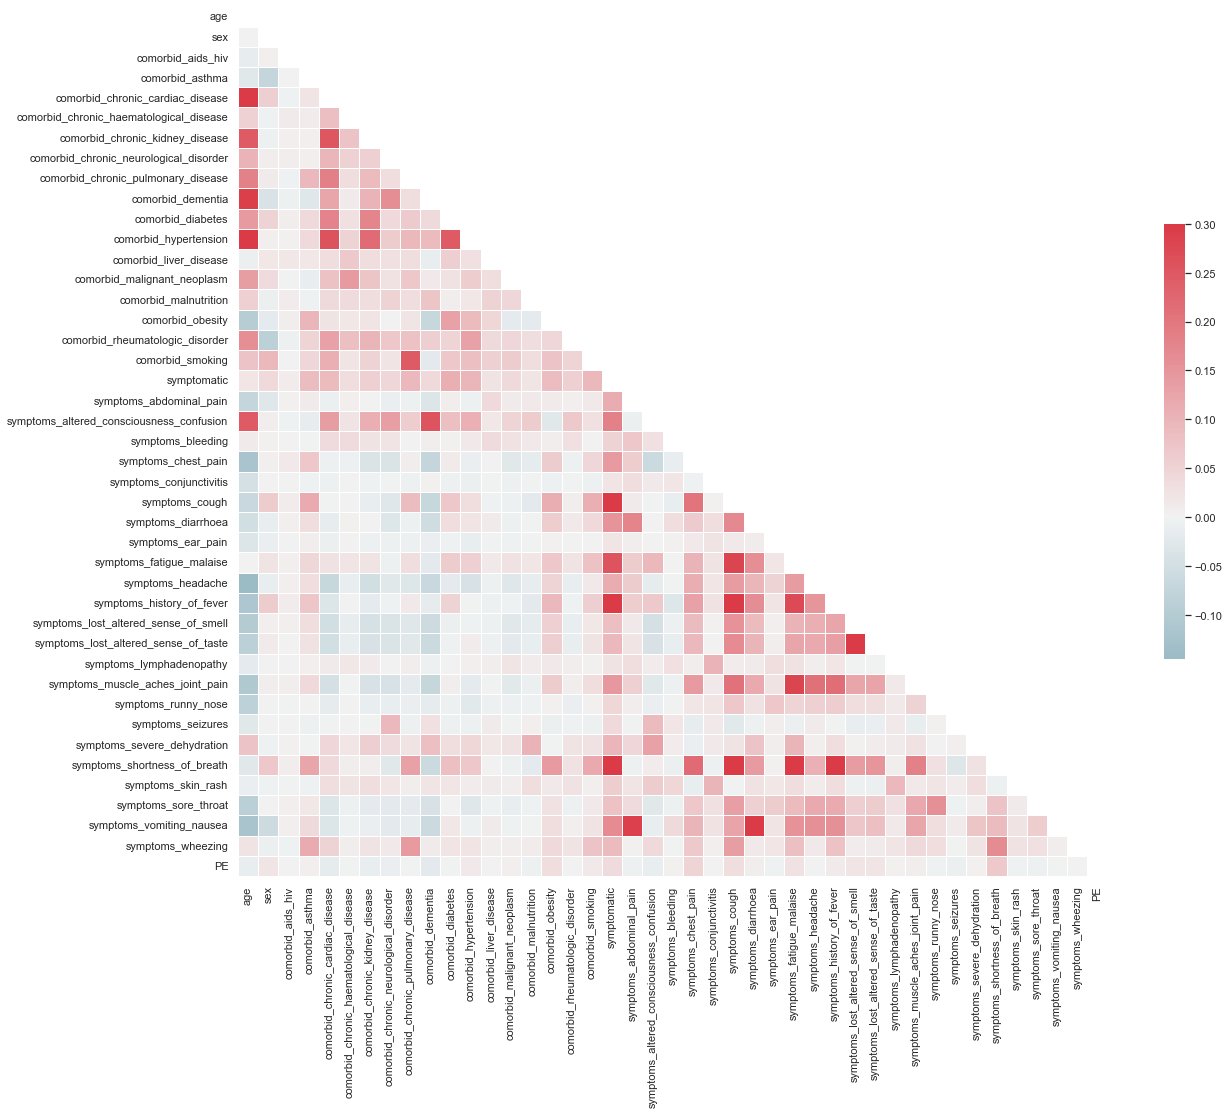

In [200]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [201]:
c = data.corr()
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
c

,age,sex,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE
age,1.000000,0.000965,-0.015742,-0.025698,0.343135,0.053414,0.243979,0.102872,0.182449,0.290659,0.141211,0.310628,-0.008688,0.137854,0.053979,-0.096692,0.159714,0.077651,0.019096,-0.072481,0.243867,0.012150,-0.119275,-0.045143,-0.065867,-0.053370,-0.034772,0.002363,-0.144497,-0.112080,-0.100136,-0.088565,-0.020436,-0.106387,-0.084336,-0.025306,0.074385,-0.025592,-0.009333,-0.089673,-0.119738,0.025377,-0.014165
sex,0.000965,1.000000,0.006038,-0.075006,0.058299,-0.002791,-0.005719,0.006667,0.012199,-0.037415,0.051208,0.004897,0.017536,0.036664,-0.008595,-0.020919,-0.086568,0.093877,0.042767,-0.028513,0.006858,0.003565,0.005341,0.002155,0.062900,-0.011842,-0.009492,0.024118,-0.012758,0.063849,0.005987,0.012876,0.000257,0.009161,0.001920,0.002860,-0.002444,0.069298,-0.002313,0.001628,-0.061051,-0.008175,0.022798
comorbid_aids_hiv,-0.015742,0.006038,1.000000,0.000373,-0.002184,0.012494,0.005230,0.008012,-0.002336,-0.006275,0.007788,0.003719,0.018159,-0.001497,0.010588,0.008105,-0.004097,0.001198,0.011326,0.003268,-0.002517,0.000325,0.014452,0.000223,0.011175,0.004879,0.001592,0.005170,0.006375,0.011347,0.006344,0.002408,0.002621,0.007613,-0.000583,0.000037,0.003599,0.009001,-0.002026,0.005255,0.004993,-0.002502,0.000718
comorbid_asthma,-0.025698,-0.075006,0.000373,1.000000,0.022573,0.010779,0.006251,0.005746,0.091834,-0.028519,0.041377,0.042022,0.018382,-0.012113,-0.002934,0.098331,0.048261,0.044510,0.086323,0.013122,-0.014581,-0.001240,0.067709,-0.003753,0.114564,0.032016,0.007189,0.045124,0.035057,0.072058,0.031106,0.027721,0.005084,0.041467,0.002734,-0.006797,-0.001916,0.124228,-0.002276,0.018287,0.038742,0.115771,0.006426
comorbid_chronic_cardiac_disease,0.343135,0.058299,-0.002184,0.022573,1.000000,0.080814,0.253952,0.098508,0.185505,0.124417,0.179199,0.258090,0.033309,0.078343,0.038318,0.025209,0.129279,0.108176,0.090354,-0.007512,0.136806,0.036756,-0.004230,-0.005242,-0.001018,-0.015666,-0.009007,0.026729,-0.068380,-0.031826,-0.053972,-0.050942,0.013184,-0.046682,-0.017231,-0.000418,0.044555,0.042926,0.033198,-0.033485,-0.032376,0.050934,-0.017636
comorbid_chronic_haematological_disease,0.053414,-0.002791,0.012494,0.010779,0.080814,1.000000,0.077387,0.053311,0.034267,0.011868,0.030401,0.050078,0.066447,0.143891,0.037775,0.017397,0.079758,0.023566,0.035764,0.006149,0.024903,0.036825,-0.006874,-0.000365,0.002463,0.004695,0.000669,0.021242,-0.011143,0.002742,-0.015066,-0.010908,0.018611,-0.001930,0.002009,0.001523,0.020093,0.006712,0.025332,-0.005278,-0.002529,0.009426,-0.001924
comorbid_chronic_kidney_disease,0.243979,-0.005719,0.005230,0.006251,0.253952,0.077387,1.000000,0.056740,0.089244,0.102409,0.175417,0.220105,0.034928,0.073091,0.034236,0.021455,0.099029,0.050968,0.055120,-0.000031,0.108637,0.024395,-0.035903,-0.002477,-0.011781,0.001003,-0.007314,0.025206,-0.051243,-0.018851,-0.042669,-0.039100,0.012593,-0.039295,-0.011648,-0.000915,0.057446,0.007243,0.031246,-0.020594,-0.009982,0.024571,-0.010956
comorbid_chronic_neurological_disorder,0.102872,0.

In [202]:
# Get stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

X = data.drop('PE', axis=1, inplace=False).to_numpy()
y = data['PE'].to_numpy()

sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [171138 110972  49692 ... 234110  63225 195517] TEST: [189962 108635 201048 ... 145129 227922 174434]


In [203]:
np.save('X_train_PE_no_lab_measurement_UK', X_train)
np.save('X_test_PE_no_lab_measurement_UK', X_test)
np.save('y_train_PE_no_lab_measurement_UK', y_train)
np.save('y_test_PE_no_lab_measurement_UK', y_test)

# Only Spain

In [204]:
data = pd.read_csv("data/data_PE_no_lab_measurements_Spain.csv")

In [205]:
data

,Unnamed: 0,age,sex,country,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_immunosuppression,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,comorbid_tuberculosis,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE
0,294,49.0,Male,Spain,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,295,47.0,Male,Spain,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,296,86.0,Male,Spain,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
3,297,77.0,Male,Spain,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,298,75.0,Female,Spain,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15203,800455,54.0,Male,Spain,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
15204,800456,56.0,Female,Spain,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
15205,800457,49.0,Male,Spain,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False
15206,800458,71.0,Male,Spain,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False


In [206]:
# Drop old index and country
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('country', axis=1, inplace=True)
data.drop('comorbid_tuberculosis', axis=1, inplace=True)
data.drop('comorbid_immunosuppression', axis=1, inplace=True)

In [207]:
# Encode sex
data['sex'] = data['sex'].map({'Male':1, 'Female':0})

In [208]:
# Convert boolean to binary variables
f = lambda x: 1 if x==True else 0
data.iloc[:, 2:] = data.iloc[:, 2:].applymap(f)

In [209]:
# Missing values per feature
data.isnull().sum(axis = 0)

age                                         0
sex                                         0
comorbid_aids_hiv                           0
comorbid_asthma                             0
comorbid_chronic_cardiac_disease            0
comorbid_chronic_haematological_disease     0
comorbid_chronic_kidney_disease             0
comorbid_chronic_neurological_disorder      0
comorbid_chronic_pulmonary_disease          0
comorbid_dementia                           0
comorbid_diabetes                           0
comorbid_hypertension                       0
comorbid_liver_disease                      0
comorbid_malignant_neoplasm                 0
comorbid_malnutrition                       0
comorbid_obesity                            0
comorbid_rheumatologic_disorder             0
comorbid_smoking                            0
symptomatic                                 0
symptoms_abdominal_pain                     0
symptoms_altered_consciousness_confusion    0
symptoms_bleeding                 

<AxesSubplot:>

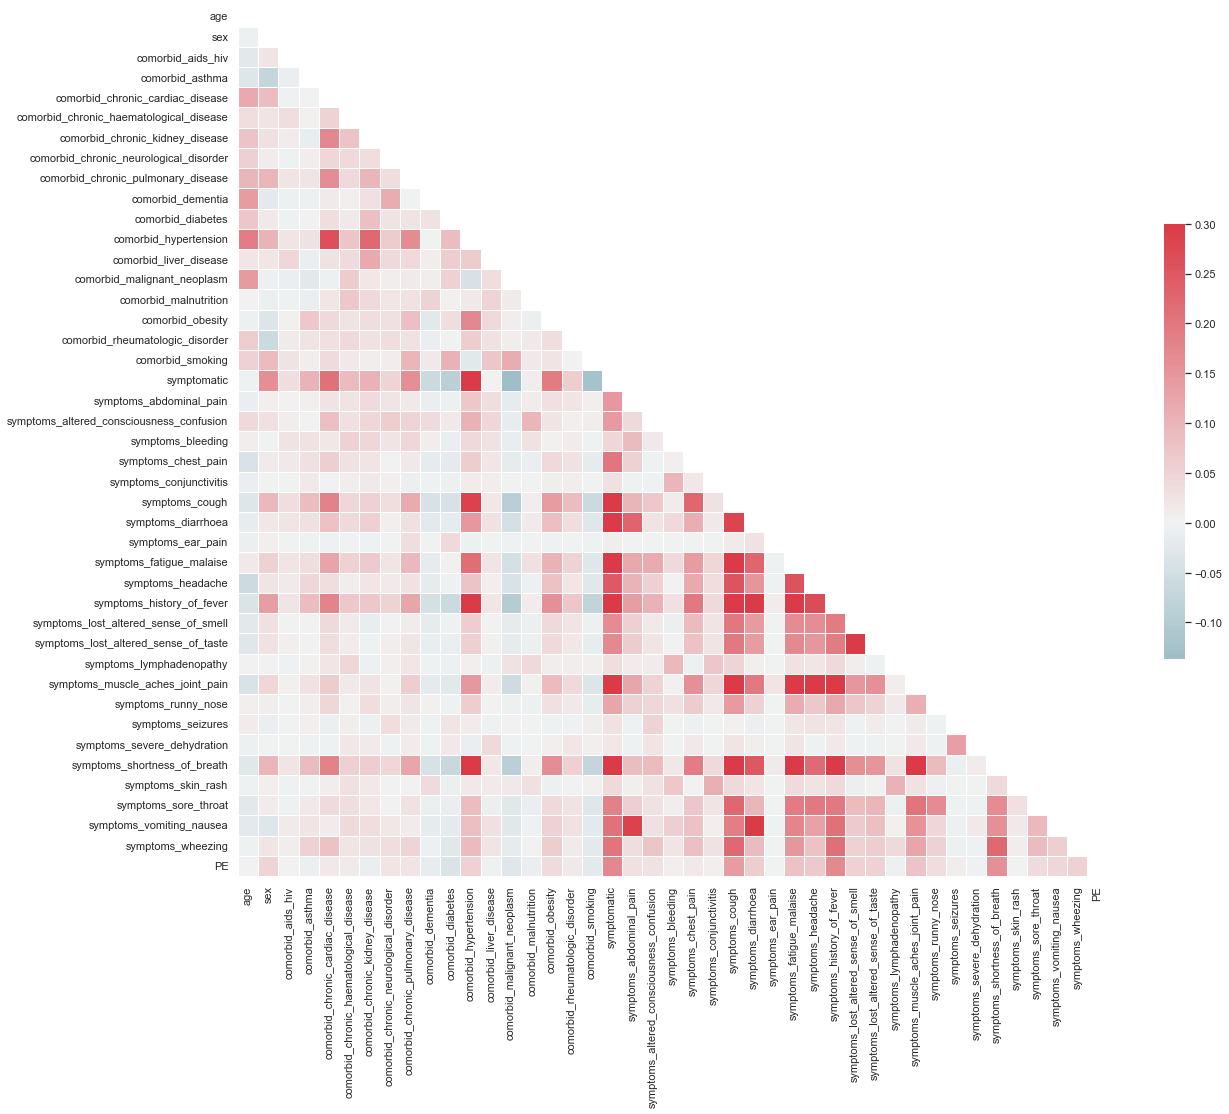

In [210]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [211]:
c = data.corr()
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
c

,age,sex,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE
age,1.000000,-0.005748,-0.025358,-0.032026,0.118135,0.031677,0.075785,0.054854,0.096881,0.138990,0.071453,0.190538,0.019374,0.140348,0.001576,-0.006754,0.060942,0.053950,-0.004223,-0.009663,0.041907,0.007018,-0.038704,-0.009177,-0.031451,-0.014091,-0.007113,0.014383,-0.058950,-0.034573,-0.025213,-0.027365,0.001532,-0.038110,0.005817,0.010573,-0.005639,-0.026592,-0.002306,-0.024338,-0.023059,-0.002344,0.001042
sex,-0.005748,1.000000,0.022411,-0.071719,0.084811,0.023771,0.029852,0.011357,0.098865,-0.022834,0.015172,0.100759,0.018801,-0.005963,-0.007249,-0.033267,-0.060426,0.091955,0.159494,0.005842,0.029126,-0.000926,0.013287,-0.000449,0.093561,0.017645,0.006310,0.052682,0.021528,0.137343,0.029291,0.026502,0.001254,0.045754,0.008925,-0.009341,-0.000854,0.097715,0.005932,0.010544,-0.030820,0.022964,0.049216
comorbid_aids_hiv,-0.025358,0.022411,1.000000,-0.011530,-0.003928,0.033524,0.011644,-0.003815,0.021567,-0.006415,-0.004131,0.022583,0.042674,-0.009826,-0.002727,0.004650,0.013585,0.024792,0.031129,0.000842,0.009979,0.024379,0.014435,-0.001593,0.033125,0.021424,-0.000442,0.020546,0.012600,0.022218,-0.001553,0.005881,-0.001654,0.005117,0.003241,-0.001466,-0.000988,0.021908,-0.002254,-0.002840,0.013659,0.007640,0.001875
comorbid_asthma,-0.032026,-0.071719,-0.011530,1.000000,-0.000404,0.003529,-0.012805,0.007242,0.023485,-0.005359,0.002164,0.028290,-0.009769,-0.024572,-0.010593,0.069397,0.025595,0.007370,0.100734,0.006770,0.001035,0.026420,0.029039,0.016024,0.085246,0.030169,-0.001716,0.035839,0.044142,0.084139,0.001021,0.002851,0.004279,0.028312,0.008615,0.006380,-0.003838,0.088108,-0.000901,0.016019,0.021606,0.052266,-0.007983
comorbid_chronic_cardiac_disease,0.118135,0.084811,-0.003928,-0.000404,1.000000,0.050716,0.171716,0.047462,0.163022,0.012093,0.034625,0.264649,0.028666,-0.005897,0.019970,0.042317,0.030614,0.037246,0.208324,0.025610,0.083213,0.018670,0.057241,0.001836,0.182034,0.076892,-0.002081,0.127041,0.035355,0.177951,0.038499,0.031456,0.019220,0.062793,0.044732,-0.006906,-0.004655,0.181851,0.009207,0.036975,0.011927,0.079983,0.016303
comorbid_chronic_haematological_disease,0.031677,0.023771,0.033524,0.003529,0.050716,1.000000,0.075371,0.040829,0.040347,0.006323,0.016034,0.074219,0.037417,0.061841,0.069269,0.025495,0.041459,0.016542,0.089572,0.025091,0.029420,0.052556,0.028360,0.008231,0.045826,0.039085,-0.001411,0.052075,0.007317,0.069892,0.012066,0.011896,0.046065,0.016896,0.004160,0.009799,0.018318,0.055142,0.030492,0.033557,0.038190,0.022804,0.012379
comorbid_chronic_kidney_disease,0.075785,0.029852,0.011644,-0.012805,0.171716,0.075371,1.000000,0.034783,0.096588,0.029309,0.081901,0.224018,0.119309,0.017916,0.040154,0.034998,0.027572,0.009927,0.104601,0.037134,0.046058,0.046655,0.021705,0.015445,0.053929,0.055939,-0.001754,0.065863,0.019173,0.068497,-0.012293,-0.004582,-0.006567,0.025354,0.030908,-0.005821,0.013626,0.060412,0.014151,0.017754,0.034001,0.026525,-0.009592
comorbid_chronic_neurological_disorder,0.054854,0.011357,-0.003815,0.007242

In [212]:
# Get stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

X = data.drop('PE', axis=1, inplace=False).to_numpy()
y = data['PE'].to_numpy()

sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 9520  9250  7866 ...  2188 12300  6071] TEST: [ 7036  3137 13796 ...    60  9835 11055]


In [213]:
np.save('X_train_PE_no_lab_measurement_Spain', X_train)
np.save('X_test_PE_no_lab_measurement_Spain', X_test)
np.save('y_train_PE_no_lab_measurement_Spain', y_train)
np.save('y_test_PE_no_lab_measurement_Spain', y_test)

# Death

In [2]:
data = pd.read_csv("data/data_death_no_lab_measurements.csv")

In [3]:
data

,Unnamed: 0,agegp10,sex,country,region,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,...,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE,death
0,294,"[40,60)",Male,Spain,Europe & CA,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0
1,295,"[40,60)",Male,Spain,Europe & CA,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,296,"[80,120)",Male,Spain,Europe & CA,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,0
3,297,"[60,80)",Male,Spain,Europe & CA,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,0
4,298,"[60,80)",Female,Spain,Europe & CA,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734277,800455,"[40,60)",Male,Spain,Europe & CA,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,0
734278,800456,"[40,60)",Female,Spain,Europe & CA,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,0
734279,800457,"[40,60)",Male,Spain,Europe & CA,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
734280,800458,"[60,80)",Male,Spain,Europe & CA,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0


In [4]:
# Drop old index
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.columns

Index(['agegp10', 'sex', 'country', 'region', 'comorbid_aids_hiv',
       'comorbid_asthma', 'comorbid_chronic_cardiac_disease',
       'comorbid_chronic_haematological_disease',
       'comorbid_chronic_kidney_disease',
       'comorbid_chronic_neurological_disorder',
       'comorbid_chronic_pulmonary_disease', 'comorbid_dementia',
       'comorbid_diabetes', 'comorbid_hypertension',
       'comorbid_immunosuppression', 'comorbid_liver_disease',
       'comorbid_malignant_neoplasm', 'comorbid_malnutrition',
       'comorbid_obesity', 'comorbid_rheumatologic_disorder',
       'comorbid_smoking', 'comorbid_tuberculosis', 'symptomatic',
       'symptoms_abdominal_pain', 'symptoms_altered_consciousness_confusion',
       'symptoms_bleeding', 'symptoms_chest_pain', 'symptoms_conjunctivitis',
       'symptoms_cough', 'symptoms_diarrhoea', 'symptoms_ear_pain',
       'symptoms_fatigue_malaise', 'symptoms_headache',
       'symptoms_history_of_fever', 'symptoms_lost_altered_sense_of_smell',


In [6]:
features = ['Age', 'Sex', 'Country', 'Region', 'AIDS', 'Asthma',
       'Chronic cardiac disease',
       'Chronic haematological disease',
       'Chronic kidney disease',
       'Chronic neurological disorder',
       'Chronic pulmonary disease', 'Dementia',
       'Diabetes', 'Hypertension', 'Immunosupression', 'Liver disease',
       'Malignant neoplasm', 'Malnutrition',
       'Obesity', 'Rheumatologic disorder',
       'Smoking', 'Tuberculosis', 'Symptomatic',
       'Abdominal pain', 'Confusion',
       'Bleeding', 'Chest pain', 'Conjunctivitis',
       'Cough', 'Diarrhoea', 'Ear pain',
       'Fatigue malaise', 'Headache',
       'Fever', 'Lost or altered sense of smell',
       'Lost or altered sense of taste', 'Lymphadenopathy',
       'Muscle aches or joint pain', 'Runny nose',
       'Seizures', 'Severe dehydration',
       'Shortness of breath', 'Skin rash',
       'Sore throat', 'Vomiting or nausea', 'Wheezing', 'PE', 'Death']

In [7]:
# Encode sex, region, country, age
data['sex'] = data['sex'].map({'Male':1, 'Female':0})
le = preprocessing.LabelEncoder()
data['region'] = le.fit_transform(data['region'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
le = preprocessing.LabelEncoder()
data['country'] = le.fit_transform(data['country'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
data['agegp10'] = data['agegp10'].map({'[80,120)':4, '[60,80)':3, '[40,60)':2, '[20,40)':1, '[0,20)':0})

{'EA': 0, 'Europe & CA': 1, 'LA': 2, 'MENA': 3, 'NAM': 4, 'SA': 5, 'SSA': 6}
{'Argentina': 0, 'Australia': 1, 'Austria': 2, 'Bangladesh': 3, 'Belgium': 4, 'Bolivia': 5, 'Brazil': 6, 'Canada': 7, 'Chile': 8, 'China': 9, 'Colombia': 10, 'Croatia': 11, 'Czechia': 12, 'Dominican Republic': 13, 'Ecuador': 14, 'Estonia': 15, 'France': 16, 'Germany': 17, 'Ghana': 18, 'Gibraltar': 19, 'Greece': 20, 'Honduras': 21, 'Hong Kong': 22, 'India': 23, 'Indonesia': 24, 'Ireland': 25, 'Israel': 26, 'Italy': 27, 'Japan': 28, 'Korea, Republic of': 29, 'Kuwait': 30, 'Lao PDR': 31, 'Malawi': 32, 'Malaysia': 33, 'Mexico': 34, 'Nepal': 35, 'Netherlands': 36, 'New Zealand': 37, 'Norway': 38, 'Pakistan': 39, 'Peru': 40, 'Philippines': 41, 'Poland': 42, 'Portugal': 43, 'Qatar': 44, 'Romania': 45, 'Russian Federation': 46, 'Saudi Arabia': 47, 'South Africa': 48, 'Spain': 49, 'Thailand': 50, 'Ukraine': 51, 'United Arab Emirates': 52, 'United Kingdom': 53, 'United States': 54, 'Vietnam': 55}


In [8]:
data

,agegp10,sex,country,region,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,...,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE,death
0,2,1,49,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0
1,2,1,49,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,4,1,49,1,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,0
3,3,1,49,1,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,0
4,3,0,49,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734277,2,1,49,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,0
734278,2,0,49,1,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0
734279,2,1,49,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
734280,3,1,49,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0


In [9]:
# Convert boolean to binary variables
f = lambda x: 1 if x==True else 0
data.iloc[:, 4:-1] = data.iloc[:, 4:-1].applymap(f)

In [10]:
data.columns = features

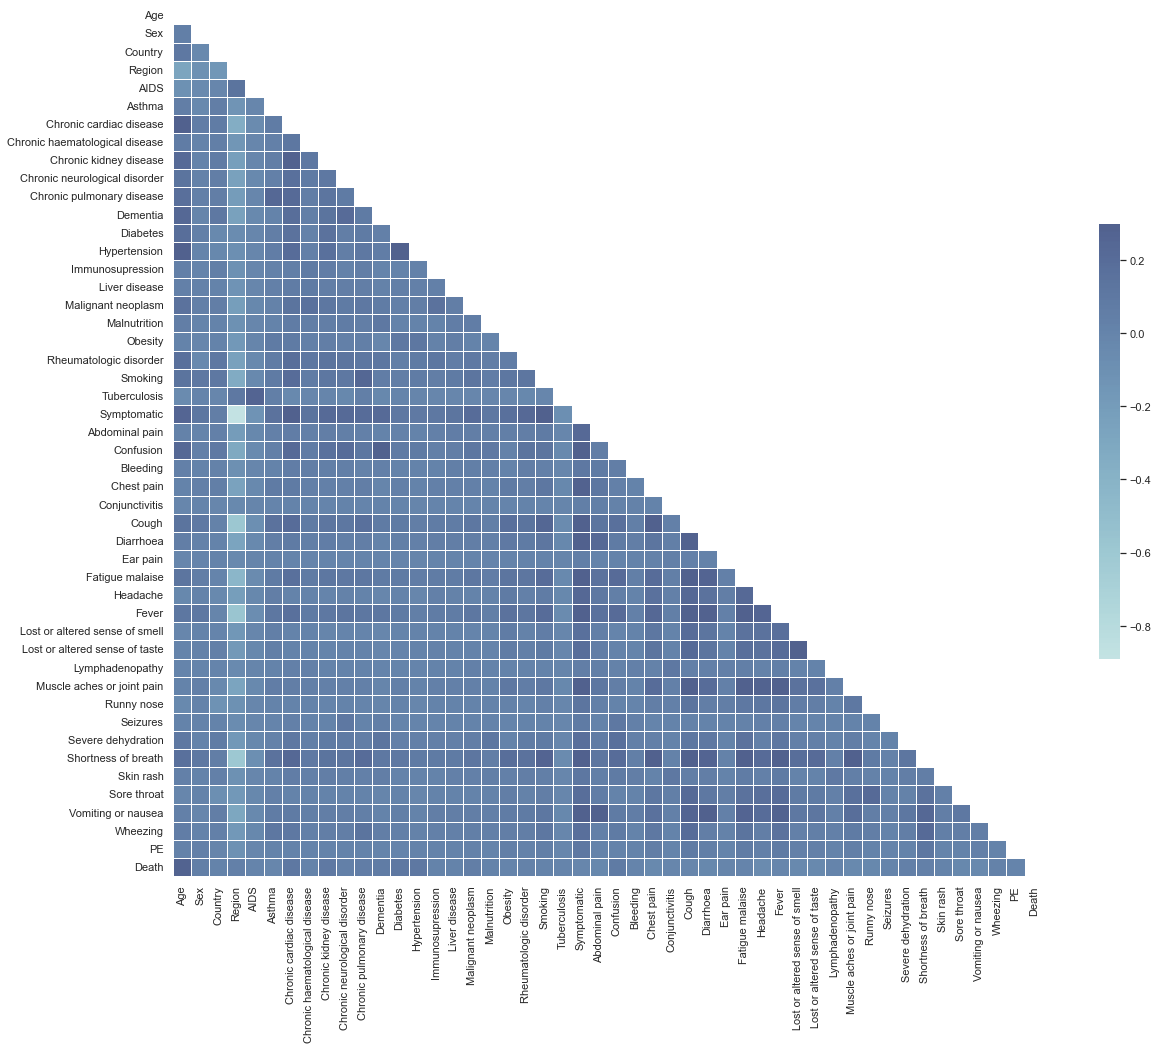

In [14]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('Correlation_Death.png', dpi=600, bbox_inches='tight')

In [58]:
c = data.corr()
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
c

,Age,Sex,Country,Region,AIDS,Asthma,Chronic cardiac disease,Chronic haematological disease,Chronic kidney disease,Chronic neurological disorder,Chronic pulmonary disease,Dementia,Diabetes,Hypertension,Immunosupression,Liver disease,Malignant neoplasm,Malnutrition,Obesity,Rheumatologic disorder,Smoking,Tuberculosis,Symptomatic,Abdominal pain,Confusion,Bleeding,Chest pain,Conjunctivitis,Cough,Diarrhoea,Ear pain,Fatigue malaise,Headache,Fever,Lost or altered sense of smell,Lost or altered sense of taste,Lymphadenopathy,Muscle aches or joint pain,Runny nose,Seizures,Severe dehydration,Shortness of breath,Skin rash,Sore throat,Vomiting or nausea,Wheezing,PE,Death
Age,1.000000,0.041362,0.099841,-0.284940,-0.103331,0.049989,0.312064,0.076756,0.222627,0.141119,0.180702,0.246717,0.186731,0.322261,0.028938,0.036624,0.149960,0.061974,0.012968,0.169419,0.145708,-0.056784,0.254976,0.021832,0.237994,0.036576,0.011632,-0.016962,0.138921,0.054955,-0.008095,0.136680,-0.023294,0.110383,-0.014527,0.000781,0.000406,0.019908,-0.033489,0.007596,0.099062,0.174006,0.027923,-0.020744,0.025964,0.066048,0.024550,0.277560
Sex,0.041362,1.000000,-0.035605,-0.106447,-0.048358,-0.036905,0.065945,0.012219,0.018236,0.023984,0.027295,-0.002531,0.028272,-0.001982,0.005611,0.023820,0.038121,0.003401,-0.009080,-0.030322,0.103218,0.005287,0.109929,0.000906,0.029945,0.010435,0.025897,0.006261,0.092862,0.021091,-0.002122,0.056842,0.014491,0.096465,0.017641,0.022217,0.004472,0.035776,0.011488,0.007460,0.011998,0.096382,0.007318,0.018466,-0.009764,0.010877,0.028601,0.044197
Country,0.099841,-0.035605,1.000000,-0.151562,-0.009656,0.060329,0.074397,0.040079,0.068114,0.055951,0.060170,0.107018,-0.039814,-0.023243,0.044830,0.015071,0.059385,0.007857,0.020442,0.096569,0.100819,-0.009902,0.055699,0.032511,0.092950,0.025426,0.043380,-0.011156,0.022739,0.010905,0.010005,-0.000196,-0.040036,-0.006002,0.005182,0.036377,0.004035,-0.033814,-0.114606,0.014802,0.072290,0.054278,0.029142,-0.077793,0.049761,0.038701,-0.004419,0.012242
Region,-0.284940,-0.106447,-0.151562,1.000000,0.139270,-0.140875,-0.348992,-0.142914,-0.223809,-0.234785,-0.202240,-0.240611,-0.068531,-0.078702,-0.104300,-0.127168,-0.208425,-0.102282,-0.161218,-0.241970,-0.328960,0.098790,-0.890336,-0.202453,-0.307937,-0.092393,-0.252108,-0.039602,-0.587193,-0.273860,-0.038715,-0.433098,-0.215587,-0.564296,-0.158659,-0.172263,-0.047386,-0.270574,-0.108778,-0.071335,-0.168827,-0.598475,-0.105955,-0.164849,-0.291034,-0.165420,-0.102951,0.028375
AIDS,-0.103331,-0.048358,-0.009656,0.139270,1.000000,-0.010222,-0.049129,-0.018303,-0.018479,-0.032807,-0.013315,-0.035423,-0.018813,-0.015501,-0.010273,-0.014657,-0.026006,-0.011749,-0.002633,-0.035616,-0.030614,0.271815,-0.124599,-0.028577,-0.045055,-0.013356,-0.032493,-0.005894,-0.079876,-0.038334,-0.005354,-0.057608,-0.027057,-0.075709,-0.020458,-0.023759,-0.006199,-0.037921,-0.012879,-0.010615,-0.023121,-0.083640,-0.015251,-0.021843,-0.041085,-0.023487,-0.015316,0.004348
Asthma,0.049989,-0.036905,0.060329,-0.140875,-0.010222,1.000000,0.068185,0.028397,0.052700,0.039301,0.241910,0.016359,0.058358,0.066845,0.025255,0.030871,0.023252,0.012756,0.082189,0.072643,0.077895,0.040026,0.147215,0.039145,0.035758,0.013383,0.085391,0.002701,0.146813,0.061207,0.011114,0.088507,0.051893,0.115150,0.040029,0.042271,0.010043,0.063721,0.011558,0.005782,0.025110,0.156792,0.014145,0.029181,0.070668,0.111209,0.016416,-0.008299
Chronic cardiac disease,0.312064,0.065945,0.074397,-0.348992,-0.049129,0.068185,1.000000,0.117031,0.283348,0.171175,0.215317,0.190525,0.148460,0.200594,0.044627,0.075737,0.142287,0.071243,0.081434,0.191601,0.202606,-0.032908,0.335557,0.065803,0.223995,0.064473,0.087617,0.008147,0.201056,0.084900,0.005560,0.172404,0.014912,0.169622,0.008235,0.016596,0.026114,0.054138,0.010919,0.025893,0.099004,0.241918,0.064233,0.017781,0.078591,0.099892,0.020579,0.096231
Chronic haematological disease,0.076756,0.012219,0.040079,-0.142914,-0.018303,0.028397,0.117031,1.000000,0.100353,0.083516

In [60]:
# Get stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

X = data.drop('Death', axis=1, inplace=False).to_numpy()
y = data['Death'].to_numpy()

sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [238951 720190 529999 ...  53390 449991 596605] TEST: [518136  81079 111412 ... 547412 553449 227032]


In [61]:
np.save('X_train_death_no_lab_measurement', X_train)
np.save('X_test_death_no_lab_measurement', X_test)
np.save('y_train_death_no_lab_measurement', y_train)
np.save('y_test_death_no_lab_measurement', y_test)